In [28]:
import sys
sys.path.append("../..")

import pandas

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

In [29]:
people = getDfPersonAdultsMale()["PESSOA"].to_list()

# Get all personID
# people = list(dictMealState)
personID = people[1]
personID = people[0]
# personID = 'UNKNOW'
print("people:", people)
print("personID:", personID)

people: ['110000016#2#1#3', '110000016#7#1#1', '110000602#2#1#1', '110000602#5#1#1', '110000602#8#1#2', '110000602#9#1#1', '110000620#13#1#1', '110001098#8#1#1', '110001197#11#1#1', '110001197#7#1#2', '110001240#13#1#1', '110001665#16#1#1', '110001665#2#1#2', '110002023#12#1#1', '110002041#11#1#2', '110002041#11#1#3', '110002041#4#1#3', '110002149#10#1#2', '110002149#11#1#1', '110002291#12#1#1', '110002291#8#1#1', '110002334#11#1#2', '110002334#12#1#1', '110002334#3#1#2', '110004152#10#1#1', '110004152#5#1#2', '110004152#7#1#2', '110004444#13#1#1', '110004444#15#1#2', '110004444#15#1#3', '110004557#1#1#1', '110004557#3#1#1', '110004584#10#1#1', '110004584#15#1#1', '110004584#16#1#1', '110004584#6#1#1', '110004584#6#1#2', '110004906#13#1#2', '110005150#1#1#1', '110005150#13#1#1', '110005150#16#1#1', '110005150#17#1#1', '110005400#11#1#1', '110005400#9#1#1', '110005482#10#1#1', '110005539#9#1#4', '110005695#11#1#1', '110005695#12#1#2', '110005695#2#1#1', '110005695#4#1#1', '110006066#8#1

In [30]:
dfConsumo = getDfConsumo()

In [31]:
columns = [
    # "PESSOA",
    "GRAMATURA1",
    "QTD",
    "COD_TBCA",
    "V9001",
    "ENERGIA_KCAL",
    "PTN",
    "CHOTOT",
    "LIP",
    "V9015"
]

In [32]:
dfConsumo[dfConsumo["PESSOA"]==personID][columns]

,GRAMATURA1,QTD,COD_TBCA,V9001,ENERGIA_KCAL,PTN,CHOTOT,LIP,V9015
54,70.0,70.0,C0002A,8000101,210.00,6.881,43.1480,1.4840,8H
55,0.0,14.0,C0008D,7901602,89.60,0.000,0.0000,9.9596,8H
56,35.0,105.0,C0638F,7112802,171.15,29.064,0.7770,5.8380,12H
57,140.0,280.0,C0091T,6303102,221.20,13.132,40.9080,4.8160,12H
58,150.0,150.0,C0081H,8501303,54.00,2.595,5.4450,2.4600,8H
59,0.0,15.0,C0007K,6906602,59.55,0.024,14.8545,0.0000,8H
60,45.0,135.0,C0209A,6300101,186.30,3.240,39.3255,2.1465,12H
61,45.0,135.0,C0209A,6300101,186.30,3.240,39.3255,2.1465,20H
62,35.0,70.0,C0091T,6303102,55.30,3.283,10.2270,1.2040,20H
63,35.0,105.0,C0638F,7112802,171.15,29.064,0.7770,5.8380,20H


In [33]:
initialState = State.getStateByPersonId(personID)

print( sum( 1 for x in list(initialState.data.values()) if x >0 ) )

7


In [34]:
dfPerson = getDfPerson()
dfPerson[ ((dfPerson["AGE"]>18) & (dfPerson["AGE"]<30)) ]

,PESSOA,ENERGIA_KCAL,CHOTOT,PTN,LIP,FIBRA,COLEST,CALCIO,SODIO,POTASSIO,...,FOSFORO,ZINCO,UF,RENDA_TOTAL,ESTRATO_POF,EER,AGE,HEIGHT,WEIGHT,GENDER
9,110000016#7#1#5,1728.680,178.36570,66.84880,85.97640,11.69930,198.39400,763.84230,2481.07630,1610.56070,...,972.77120,11.56630,7407407407407406813548642304.0,6253.24,1101.0,1971.590,19.0,155.0,47.0,female
13,110000584#8#1#1,1368.950,167.88100,58.72900,55.09880,16.92500,73.09050,93.31670,2648.91560,1412.22870,...,613.82310,8.50700,12345679012345678.0,5305.86,1101.0,1958.430,27.0,161.0,50.0,female
25,110000620#13#1#2,2055.000,128.43300,195.92050,88.59750,21.51000,362.10550,427.90900,904.48550,3924.23450,...,1467.41800,38.80500,138888888888888.875,2151.57,1105.0,2238.790,23.0,165.0,68.0,female
29,110001098#12#1#2,2062.000,291.97050,89.13100,65.72830,26.54250,141.55500,512.44270,3411.77560,2539.87670,...,1111.31110,13.34750,9259259259259259453440.0,650.03,1102.0,2908.425,22.0,172.0,69.0,male
31,110001098#3#1#1,1815.950,250.08550,59.29200,66.22040,8.93400,121.64100,145.63760,2898.53980,1238.07910,...,656.48580,5.57900,854700854700854686515200.0,1912.07,1102.0,1986.510,27.0,162.0,52.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46137,530042510#9#1#3,1795.945,220.71700,87.98200,65.87200,15.73600,258.66550,282.09450,2537.68450,2106.88200,...,1041.98750,17.75250,35690235690235689473438384128.0,7553.73,5305.0,2055.830,19.0,171.0,53.0,female
46152,530042964#9#1#4,1431.435,243.05955,45.67230,36.72200,26.53120,144.91765,423.07365,1593.43415,1825.06570,...,769.69805,4.87425,44612794612794613825536.0,8540.58,5305.0,1993.420,26.0,166.0,52.0,female
46153,530044198#11#1#1,1933.000,246.74050,68.43250,78.48950,16.38900,166.55450,1449.83000,1956.29000,2313.64150,...,1219.44800,11.88900,29741863075196406820470388141588480.0,1569.03,5301.0,1958.210,25.0,157.0,49.0,female
46154,530044198#12#1#1,1445.495,168.79888,54.55089,40.15098,8.06877,140.60187,747.06229,1624.95720,1355.24815,...,907.15997,9.23614,59483726150392816.0,672.99,5301.0,2712.780,25.0,169.0,62.0,male


In [35]:
personID = "110000016#7#1#5"
personID = "UNKNOW"

In [36]:
# Init a set of states
initialState = State.getStateByPersonId(personID)
initialNutrition = Nutrition(initialState)
print(initialNutrition)

Nutrition: {'ENERGIA_KCAL': 0.0, 'CHOTOT': 0.0, 'PTN': 0.0, 'LIP': 0.0, 'FIBRA': 0.0, 'COLEST': 0.0, 'CALCIO': 0.0, 'AGTRANS': 0.0, 'AGSAT': 0.0, 'AGPOLI': 0.0, 'SODIO': 0.0, 'POTASSIO': 0.0, 'FERRO': 0.0, 'MAGNESIO': 0.0, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0, 'PIRIDOXAMINA': 0.0, 'NIACINA': 0.0, 'COBALAMINA': 0.0, 'VITC': 0.0, 'VITA_RAE': 0.0, 'COBRE': 0.0, 'FOLATO': 0.0, 'FOSFORO': 0.0, 'ZINCO': 0.0}


In [37]:
# fitness = Nutrition.absDifference
fitness = Nutrition.absDifferenceNegativePenalty
# fitness = Nutrition.distanceDifference
# result = papaSingleSeach(personID, max_population_set=10, max_population_selected=5, max_steps=1000)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=5, unit=50, max_unit=5, max_steps=25)
result = papaSingleSeach(personID, verbose=True, unit=25, max_unit=2, max_population_set=500, max_population_selected=300, expansion_set=50, expansion_select=20, max_steps=50, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, unit=100, max_unit=2, max_population_set=10, max_population_selected=10, expansion_set=10, expansion_select=3, max_steps=25, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=8, expansion_set=5, unit=5, max_unit=10, max_steps=25, fitness=Nutrition.distanceDifference)

print(result)
targetNutrition = Nutrition.idealNutritionByPersonId(personID)
print("       PersonID: ", result.personIDs)
print("initialDistance: ", fitness(result.initialNutrition, targetNutrition))
print("  finalDistance: ", fitness(result.finalNutrition, targetNutrition))

Step 50: 
Best fitness:  440.77176665143645
initialState:  State: {8000101: 0, 7901602: 0, 8501303: 0, 6906602: 0, 6300101: 0, 7112802: 0, 6303102: 0, 6601805: 0, 8201004: 0, 8570328: 0, 7108902: 0, 8510601: 0, 8200101: 0, 8500903: 0, 7004301: 0, 7004802: 0, 8002201: 0, 8400101: 0, 8004801: 0, 8500401: 0, 6501516: 0, 6300113: 0, 7800302: 0, 8500605: 0, 6902910: 0, 6803001: 0, 6901701: 0, 8201005: 0, 8002254: 0, 6900702: 0, 8503801: 0, 8300101: 0, 8501302: 0, 7109101: 0, 8511401: 0, 8280001: 0, 7800401: 0, 6701704: 0, 6801101: 0, 6300201: 0, 7803301: 0, 6400802: 0, 6802601: 0, 8216301: 0, 7104102: 0, 8502204: 0, 8502202: 0, 8579146: 0, 6501415: 0, 8500416: 0, 8003801: 0, 6901002: 0, 8002225: 0, 7104301: 0, 8570329: 0, 6503401: 0, 8102205: 0, 8500202: 0, 8102101: 0, 8002246: 0, 8200301: 0, 6501401: 0, 8500402: 0, 6803401: 0, 8003601: 0, 8504501: 0, 8502301: 0, 8500407: 0, 7903110: 0, 7901801: 0, 8206301: 0, 8500313: 0, 8500302: 0, 7902403: 0, 8200211: 0, 8202801: 0, 8570330: 0, 8500413: 

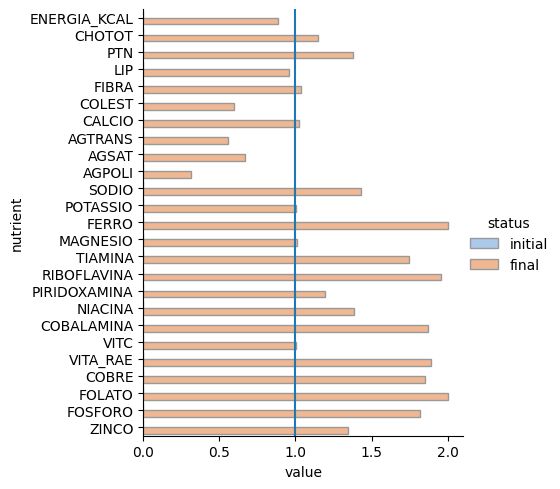

In [38]:
result.show_comparison_graph("", title="")


In [39]:
df = result.save_as_xls("./output/test_result")
df

,Nutrient,Initial Value,Final Value,Target Value
0,ENERGIA_KCAL,0.0,2119.750000,2388.840000
1,CHOTOT,0.0,62.981615,55.000000
2,PTN,0.0,13.781166,10.000000
3,LIP,0.0,6.383433,6.666667
4,FIBRA,0.0,32.100000,31.000000
5,COLEST,0.0,178.250000,300.000000
6,CALCIO,0.0,888.660000,868.000000
7,AGTRANS,0.0,0.246145,0.444444
8,AGSAT,0.0,2.982201,4.444444
9,AGPOLI,0.0,0.831784,2.666667


In [40]:
from app.components.scripts.get_tbca import TBCA

dictTBCAName = TBCA.getDictTBCA()
dictV9001ToTBCA = getDictV9001ToTbca()

In [41]:
print(dictTBCAName[dictV9001ToTBCA["7900201"]])
print(dictTBCAName[dictV9001ToTBCA["8280101"]])
print(dictTBCAName[dictV9001ToTBCA["6301201"]])
print(dictTBCAName[dictV9001ToTBCA["8501302"]])
print(dictTBCAName[dictV9001ToTBCA["6501401"]])
print(dictTBCAName[dictV9001ToTBCA["8500224"]])
print(dictTBCAName[dictV9001ToTBCA["7901201"]])
# 8000101 - Init: 0  / Final: 100.0
# 8501303 - Init: 0  / Final: 50.0
# 6803001 - Init: 0  / Final: 150.0
# 8501302 - Init: 0  / Final: 75.0
# 6501401 - Init: 0  / Final: 350.0
# 7901201 - Init: 0  / Final: 250.0
# 7102501 - Init: 0  / Final: 25.0
# 7900201 - Init: 0  / Final: 200.0
# 7101009 - Init: 0  / Final: 50.0
# 8579096 - Init: 0  / Final: 25.0
# 8280101 - Init: 0  / Final: 300.0
# 6301201 - Init: 0  / Final: 100.0

tbca code: C0043G
portuguese: Leite, vaca, integral, fluído  
english: Milk, cow, whole, fluid
nutrients: {'ENERGIA_KCAL': 0.64, 'CHOTOT': 0.0592, 'PTN': 0.029300000000000003, 'LIP': 0.0323, 'FIBRA': 0.0, 'COLEST': 0.124, 'AGSAT': 0.020099999999999996, 'AGPOLI': 0.0012, 'AGTRANS': 0.0, 'CALCIO': 1.07, 'FERRO': 0.0008, 'SODIO': 0.638, 'MAGNESIO': 0.0971, 'FOSFORO': 0.82, 'POTASSIO': 1.33, 'ZINCO': 0.0038, 'COBRE': 0.0002, 'VITA_RAE': 0.488, 'TIAMINA': 0.0004, 'RIBOFLAVINA': 0.0024, 'NIACINA': 0.0152, 'PIRIDOXAMINA': 0.0, 'COBALAMINA': 0.0037, 'VITC': 0.0, 'FOLATO': 0.0518}
tbca code: C0102C
portuguese: Uva, suco, concentrado, envasado  
english: Grape, juice, concentrated
nutrients: {'ENERGIA_KCAL': 0.58, 'CHOTOT': 0.147, 'PTN': 0.0, 'LIP': 0.0, 'FIBRA': 0.0023, 'COLEST': 0.0, 'AGSAT': 0.0, 'AGPOLI': 0.0, 'AGTRANS': 0.0, 'CALCIO': 0.0932, 'FERRO': 0.0012, 'SODIO': 0.0958, 'MAGNESIO': 0.0706, 'FOSFORO': 0.1, 'POTASSIO': 0.537, 'ZINCO': 0.0005, 'COBRE': 0.0013, 'VITA_RAE': 0.0042, 'TIAMIN

Algumas entradas possuem gramatura diferente de quantidade